In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
reddit_df = pd.read_csv('/home/jeremy/Teaching/intro_to_programming_and_ds/resources/data/100k_random_reddit_2018.csv')

In [3]:
df_by_length = reddit_df.sort_values('comment_length', ascending=False)
df_by_length.head()

,created_utc,subreddit,author,comment_length,score
21207,1522288057,LoveNikki,queerestqueen,10045,6
52329,1532344433,Music,DJ_Spam,9726,1
78315,1540314439,NewsBrasil,newsbrasilbot,9720,1
61600,1535240874,NFLstream4kHD,Illustrious_Play,9577,1
71908,1538405283,Music,DJ_Spam,9418,2


### Exercise 1

Sort the data frame by score and select the rows with the 10th to 20th highest scores.


In [11]:
df_by_score = reddit_df.sort_values('score', ascending=False)
df_by_score.iloc[10:20]

### Exercise 2

Now, how would you select just the `subreddit` and `comment_length` columns for the rows you selected above?

In [13]:
df1020 = df_by_score.iloc[10:20]
df1020[['subreddit', 'comment_length']]

,subreddit,comment_length
73188,AskReddit,127
79165,gaming,137
1963,StarWars,162
23011,AskReddit,189
64345,therewasanattempt,120
88861,fo76,42
8514,videos,84
77395,videos,70
96618,TwoXChromosomes,303
26232,LifeProTips,321


In [15]:
df_by_score.iloc[10:20,[1,3]]

,subreddit,comment_length
73188,AskReddit,127
79165,gaming,137
1963,StarWars,162
23011,AskReddit,189
64345,therewasanattempt,120
88861,fo76,42
8514,videos,84
77395,videos,70
96618,TwoXChromosomes,303
26232,LifeProTips,321


### Exercise 3

Find the average (mean) comment length for each subreddit and sort by comment length

In [21]:
reddit_df.groupby('subreddit').mean().comment_length.sort_values()

subreddit
AskTheOuija                1.0
Boilermakers               1.0
im30andthisissheep         1.0
askOuiji                   1.0
FalconsBuccaneerlive       1.0
                         ...  
EnglishOneThirtyOne     6054.0
TheTruthTellers         6214.0
DestructiveReaders      7532.0
NFLstream4kHD           9577.0
NewsBrasil              9720.0
Name: comment_length, Length: 10198, dtype: float64

### Exercise 4

Plot the number of comments and average score. Are frequent posters more likely to share comments that are well-received?

*Hint*: You will want to use a dataframe that groups the data by person

In [23]:
grouped_df = reddit_df.groupby('author')

subreddit_count = grouped_df.subreddit.nunique()
comments_count = grouped_df.size()
score_mean = grouped_df.score.mean()


person_df = pd.DataFrame({'subreddit_count': subreddit_count,
                          'comments_count': comments_count,
                          'mean_score': score_mean})

In [32]:
grouped_df.score.mean()

author
---------_---------_    1.0
--------__--_---        1.0
-----_------_---        1.0
-----o____              7.0
----Prometheus----      2.0
                       ... 
zzoy                    1.0
zzuum                   1.0
zzyul                   1.0
zzyzzx2                 1.5
zzzzz94                 6.0
Name: score, Length: 84941, dtype: float64

In [ ]:
result = {}
subreddits = []
for row in dataframe:
    author = row['author']
    result[author] = result.get(author, []).append(row['subreddit'])

In [27]:
grouped_df.subreddit.nunique()

author
---------_---------_    1
--------__--_---        1
-----_------_---        1
-----o____              1
----Prometheus----      1
                       ..
zzoy                    1
zzuum                   1
zzyul                   1
zzyzzx2                 2
zzzzz94                 2
Name: subreddit, Length: 84941, dtype: int64

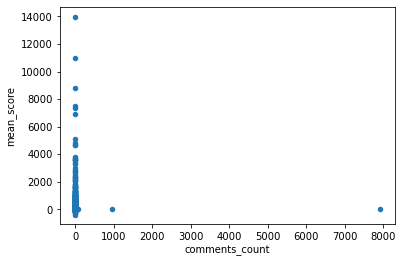

In [25]:
person_df.plot.scatter(x = 'comments_count', y = 'mean_score');

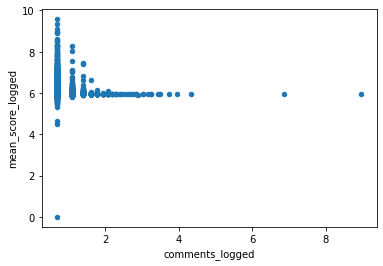

In [34]:
## Note that this is slightly different (improved) from the code in the video
person_df['comments_logged'] = np.log1p(person_df.comments_count)
# Scores can be negative, so we add the minimum (plus one) to make sure they are positive
# And then log transform
person_df['mean_score_logged'] = np.log1p(person_df.mean_score + abs(person_df.mean_score.min()))

person_df.plot.scatter(x='comments_logged', y = 'mean_score_logged');

### Exercise 5

Plot the number of comments per month over the year.

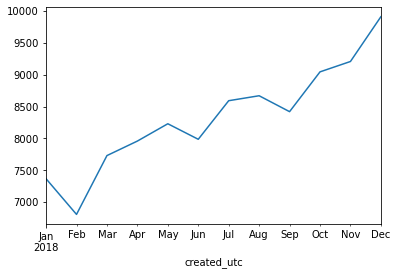

In [36]:
reddit_df.index = pd.to_datetime(reddit_df.created_utc, unit='s', utc=True)
monthly_comments = reddit_df.resample('M').size()
monthly_comments.plot();

### Exercise 6

See if you can figure out how to change the above plot so that instead of showing one overall line for comments per hour, it shows a line for each day of the week (e.g., a line for comments per hour on Mondays, another for Tuesdays, etc.).

This code can help you to get started: it sums the number of comments by hour and day.

<AxesSubplot:xlabel='created_utc'>

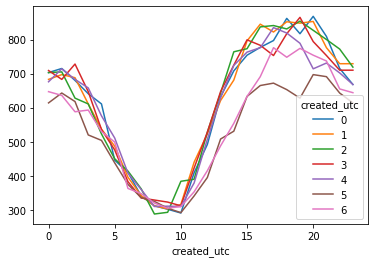

In [41]:

reddit_df.groupby([reddit_df.index.hour, reddit_df.index.weekday]).size().unstack().plot()

In [44]:
reddit_df.groupby(reddit_df.index.weekday).mean()

,created_utc,comment_length,score
created_utc,,,
0,1.531197e+09,166.903591,8.189228
1,1.531021e+09,166.886344,10.458118
2,1.531093e+09,164.661981,9.479451
3,1.531080e+09,166.660076,7.200027
4,1.531340e+09,161.482581,8.526077
5,1.531539e+09,152.759592,8.298236
6,1.531933e+09,154.687898,8.934586
